In [1]:
#import all packages and set plots to be embedded in line

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline





In [2]:
#load the data and assign the column

results = pd.read_csv(r'C:\Users\Aakash\Downloads\F1 champian ship data\results.csv', 
                      names=['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid', 'position',
                             'positionText', 'positionOrder', 'points', 'laps', 'time', 'milliseconds', 
                             'fastestLap', 'rank', 'fastestLapTime', 'fastestLapSpeed', 'statusId'],
                      header=None)

races = pd.read_csv(r'C:\Users\Aakash\Downloads\F1 champian ship data\races.csv',
                    names = ['raceId' , 'year', 'round', 'circuitId', 'name' ,'date','time',
                            'url','fp1_date','fp1_time','fp2_date','fp2_time','fp3_date', 'fp3_time',
                             'quali_date','quali_time','sprint_date','sprint_time'],
                    header = None)


drivers = pd.read_csv(r'C:\Users\Aakash\Downloads\F1 champian ship data\drivers.csv',
                      names = ['driverId' , 'driverRef' , 'number' , 'code' , 'forename', 'surname',
                               'dob', 'nationality','url'], header = None) 

constructors = pd.read_csv(r'C:\Users\Aakash\Downloads\F1 champian ship data\constructors.csv',
                           names = ['constructorId' , 'constructorRef' , 'name' , 'nationality' ,'url'],
                            header = None) 



In [3]:
# merge datasets

df = pd.merge(results , races[[ 'raceId' , 'year', 'name', 'round']], on = 'raceId' , how = 'left')
df = pd.merge(df, drivers[[ 'driverId' , 'driverRef','nationality' ]], on = 'driverId' , how = 'left')
df = pd.merge(df, constructors[[ 'constructorId','name','nationality']], on = 'constructorId' , how = 'left')



In [4]:
# drop columns
df.drop(['number' , 'position', 'positionText','laps','fastestLap','statusId', 'resultId', 'raceId','driverId',
         'constructorId'],axis = 1, inplace = True)





In [5]:
#rename columns

df.rename(columns = {'rank': 'fastest_lap_rank','name_x':'gp_name','nationality_x':'driver_nationality',
                   'name_y':'constructor_name','nationality_y':'constructor_nationality', 'driver_ref': 'driver'},inplace = True)
#print(df.columns)

In [6]:
#rearrange columns 
df = df[['year', 'gp_name','round','driverRef', 'constructor_name', 'grid','positionOrder','points',
        'time','milliseconds','fastest_lap_rank', 'fastestLapTime', 'fastestLapSpeed', 'driver_nationality', 'constructor_nationality']]

In [7]:
#drop season 2019

df = df[df['year']!= 2019]

In [8]:
#sort values

df = df.sort_values(by=['year','round','positionOrder'],ascending = [False , True, True]) 



In [9]:
# Replace \N values in time col

df.time.replace('\\N',np.nan,inplace= True)
df.milliseconds.replace('\\N',np.nan,inplace=True)
df.fastest_lap_rank.replace('\\N',np.nan,inplace=True)
df.fastestLapTime.replace('\\N',np.nan,inplace=True)
df.fastestLapSpeed.replace('\\N',np.nan,inplace=True)


In [10]:
# Convert columns to numeric, coerce non-numeric values to NaN
df['fastestLapSpeed'] = pd.to_numeric(df['fastestLapSpeed'], errors='coerce')
df['fastest_lap_rank'] = pd.to_numeric(df['fastest_lap_rank'], errors='coerce')
df['milliseconds'] = pd.to_numeric(df['milliseconds'], errors='coerce')

# Handle NaN values, e.g., by filling them with 0 or dropping them
df['fastestLapSpeed'].fillna(0, inplace=True)
df['fastest_lap_rank'].fillna(0, inplace=True)
df['milliseconds'].fillna(0, inplace=True)



In [11]:
#change datatypes

df.fastestLapSpeed = df.fastestLapSpeed.astype(float)
df.fastest_lap_rank = df.fastest_lap_rank.astype(float)
df.milliseconds = df.milliseconds.astype(float)



In [12]:
#reset index 
df.reset_index(drop=True ,inplace = True)


In [13]:
#shape

print(df.shape)

(26520, 15)


In [14]:
#info()
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26520 entries, 0 to 26519
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     26520 non-null  object 
 1   gp_name                  26520 non-null  object 
 2   round                    26520 non-null  object 
 3   driverRef                26520 non-null  object 
 4   constructor_name         26520 non-null  object 
 5   grid                     26520 non-null  object 
 6   positionOrder            26520 non-null  object 
 7   points                   26520 non-null  object 
 8   time                     7534 non-null   object 
 9   milliseconds             26520 non-null  float64
 10  fastest_lap_rank         26520 non-null  float64
 11  fastestLapTime           8021 non-null   object 
 12  fastestLapSpeed          26520 non-null  float64
 13  driver_nationality       26520 non-null  object 
 14  constructor_nationalit

In [34]:
#head()

df.head(8)

,year,gp_name,round,driverRef,constructor_name,grid,positionOrder,points,time,milliseconds,fastest_lap_rank,fastestLapTime,fastestLapSpeed,driver_nationality,constructor_nationality
1,2024,Bahrain Grand Prix,1,max_verstappen,Red Bull,1,1,26,1:31:44.742,5504742.0,1.0,1:32.608,210.383,Dutch,Austrian
2,2024,Bahrain Grand Prix,1,stroll,Aston Martin,12,10,1,+1:33.216,5597958.0,16.0,1:35.632,203.730,Canadian,British
3,2024,Bahrain Grand Prix,1,zhou,Sauber,17,11,0,NaN,0.0,14.0,1:35.458,204.102,Chinese,Swiss
4,2024,Bahrain Grand Prix,1,kevin_magnussen,Haas F1 Team,15,12,0,NaN,0.0,15.0,1:35.570,203.863,Danish,American
5,2024,Bahrain Grand Prix,1,ricciardo,RB F1 Team,14,13,0,NaN,0.0,13.0,1:35.163,204.735,Australian,Italian
6,2024,Bahrain Grand Prix,1,tsunoda,RB F1 Team,11,14,0,NaN,0.0,18.0,1:35.833,203.303,Japanese,Italian
7,2024,Bahrain Grand Prix,1,albon,Williams,13,15,0,NaN,0.0,17.0,1:35.723,203.537,Thai,British
8,2024,Bahrain Grand Prix,1,hulkenberg,Haas F1 Team,10,16,0,NaN,0.0,10.0,1:34.834,205.445,German,American


In [35]:
import seaborn as sb
import matplotlib.pyplot as plt

# Set seaborn color palette
sb.set_palette('deep')

# Adjust figure size
plt.rcParams['figure.figsize'] = 10, 6


In [36]:
# Drop non-numeric rows from 'positionOrder'
df = df[df['positionOrder'] != 'positionOrder']

# Convert 'positionOrder' to numeric
df['positionOrder'] = pd.to_numeric(df['positionOrder'], errors='coerce')

# Drop rows where 'positionOrder' became NaN
df.dropna(subset=['positionOrder'], inplace=True)

print(df['positionOrder'].unique())  # Should now only have valid numeric values


[ 1 10 11 12 13 14 15 16 17 18 19  2 20  3  4  5  6  7  8  9 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


In [37]:
driver_winner = (
    df.loc[df['positionOrder'] == 1]
    .groupby('driverRef')['positionOrder']
    .count()
    .sort_values(ascending=False)
    .to_frame()
    .reset_index()
)
print(driver_winner.head())  # Check the resulting DataFrame


            driverRef  positionOrder
0            hamilton            104
1  michael_schumacher             91
2      max_verstappen             61
3              vettel             53
4               prost             51


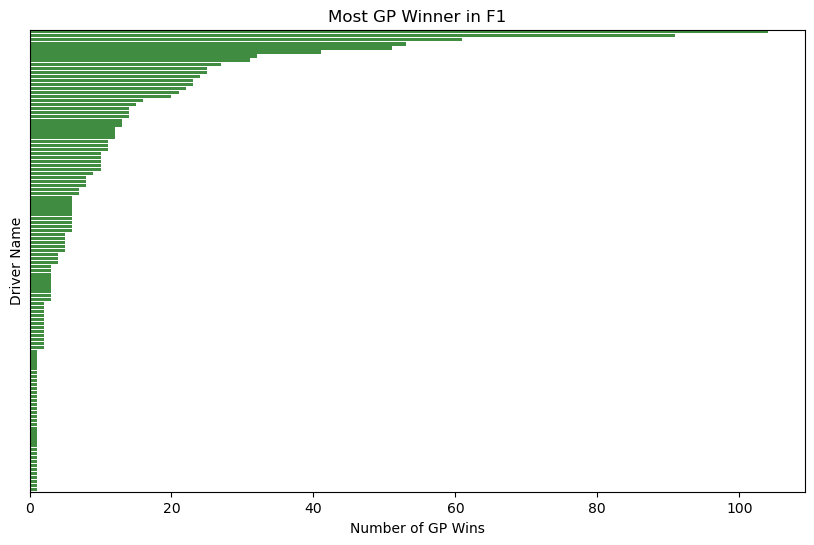

In [38]:
import seaborn as sb
import matplotlib.pyplot as plt

# Create the barplot
sb.barplot(data=driver_winner, y='driverRef', x='positionOrder',color = 'green', alpha=0.8)

# Set plot title and labels
plt.title('Most GP Winner in F1')
plt.ylabel('Driver Name')
plt.xlabel('Number of GP Wins')
plt.yticks([])  # Remove y-ticks for cleaner presentation

# Show the plot
plt.show()


In [39]:
#Create a new dataframe of top 10 GP winners
top10drivers = driver_winner.head(10)

print(top10drivers)

            driverRef  positionOrder
0            hamilton            104
1  michael_schumacher             91
2      max_verstappen             61
3              vettel             53
4               prost             51
5               senna             41
6              alonso             32
7             mansell             31
8             stewart             27
9               lauda             25


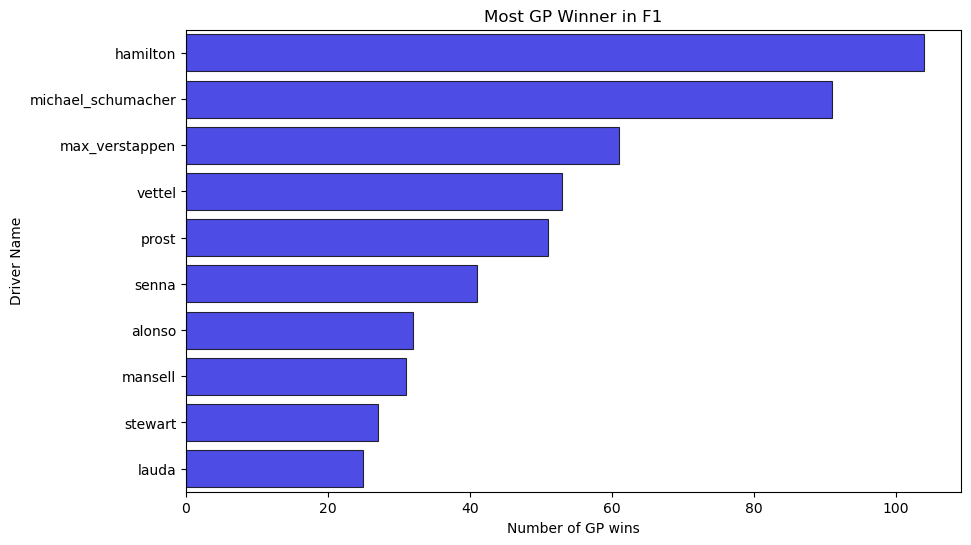

In [41]:
# top 10 drivers plot

sb.barplot(data = top10drivers,  y= 'driverRef', x = 'positionOrder', color = 'blue', alpha = 0.8, linewidth = .8, edgecolor = 'black')
plt.title('Most GP Winner in F1')
plt.ylabel('Driver Name')
plt.xlabel('Number of GP wins');

In [49]:
# GP constructors winners 


constructor_winner = (df.loc[df['positionOrder'] == 1]  # Use square brackets
                      .groupby('constructor_name')['positionOrder']
                      .count()
                      .sort_values(ascending=False).to_frame() 
                      .reset_index()
)




  constructor_name  positionOrder
0          Ferrari            246
1          McLaren            180
2         Mercedes            127
3         Red Bull            120
4         Williams            114


In [50]:
# top 10 constructor wins

top10constructor = constructor_winner.head(10)

print(top10constructor)

  constructor_name  positionOrder
0          Ferrari            246
1          McLaren            180
2         Mercedes            127
3         Red Bull            120
4         Williams            114
5       Team Lotus             45
6          Renault             35
7         Benetton             27
8          Brabham             23
9          Tyrrell             23


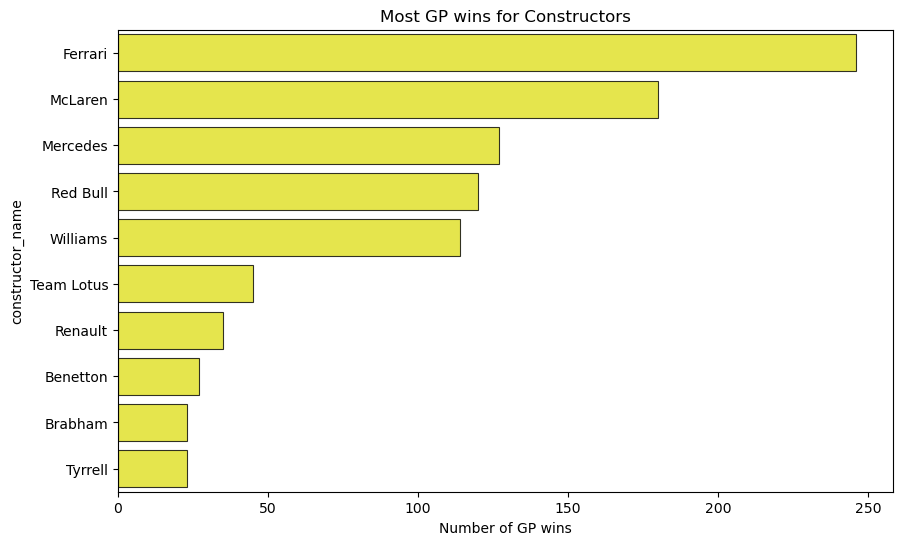

In [53]:
#constructor wins plot

sb.barplot(data = top10constructor, y='constructor_name', x = 'positionOrder', color = 'yellow',
           alpha = 0.8, linewidth = .8, edgecolor = 'black')
plt.title('Most GP wins for Constructors')
plt.ylabel('constructor_name')
plt.xlabel('Number of GP wins');



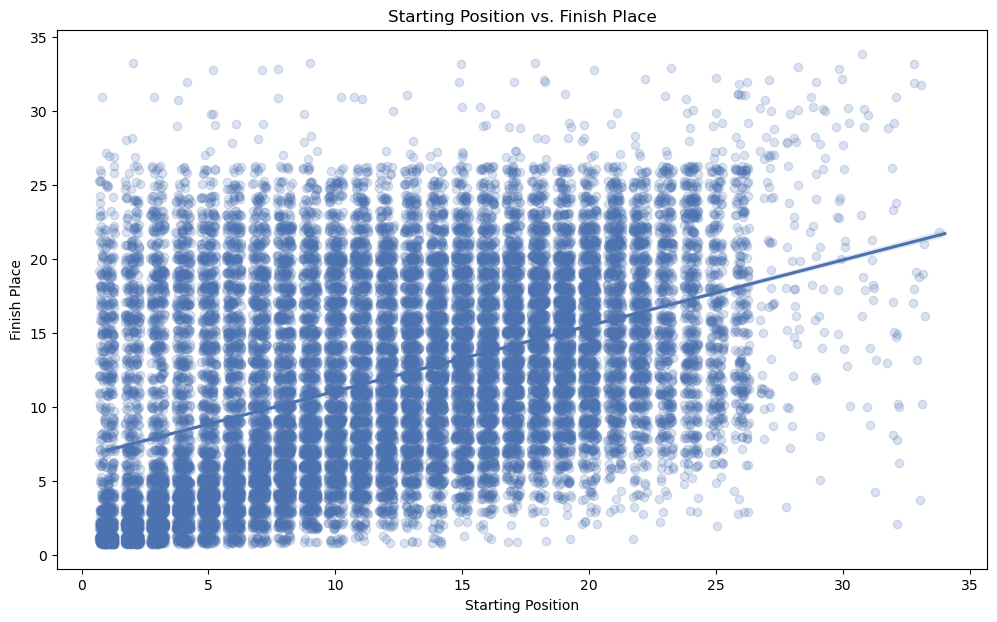

In [55]:
# Ensure data is numeric
df['grid'] = pd.to_numeric(df['grid'], errors='coerce')
df['positionOrder'] = pd.to_numeric(df['positionOrder'], errors='coerce')

# Filter out rows with grid = 0
df_no_zero = df[df['grid'] != 0]

# Create the scatterplot with regression line
plt.figure(figsize=[12, 7])
sb.regplot(data=df_no_zero, x='grid', y='positionOrder', 
           x_jitter=0.3, y_jitter=0.3, scatter_kws={'alpha': 1/5})
plt.title('Starting Position vs. Finish Place')
plt.ylabel('Finish Place')
plt.xlabel('Starting Position')
plt.show()


In [65]:



df['gp_name'] = df['gp_name'].astype(str)
print(df['gp_name'].unique())

df_cleaned = df[df['gp_name'].notna() & (df['gp_name'] != '')]

# Check again
print(df_cleaned['gp_name'].unique())

['nan']
['nan']


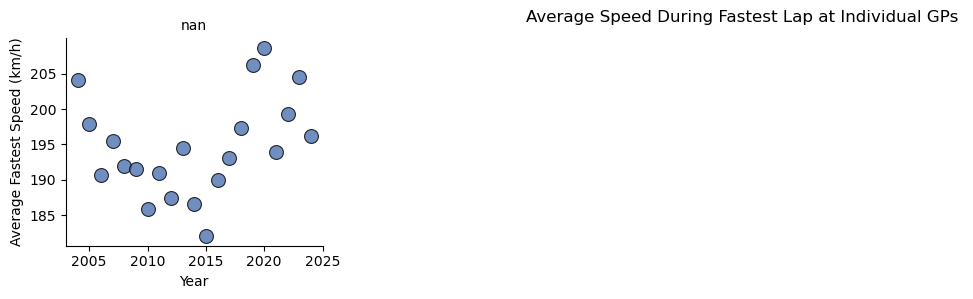

In [69]:
df_speed = df_cleaned[df_cleaned['year'] >= 2004]
df_group_speed = df_speed.groupby(['gp_name', 'year'])['fastestLapSpeed'].mean().to_frame().reset_index()

# Create a FacetGrid
g = sb.FacetGrid(data=df_group_speed, col='gp_name', col_wrap=5)
g.map(plt.scatter, 'year', 'fastestLapSpeed', alpha=0.8, linewidth=0.8, edgecolor='black', s=100)
g.set_titles("{col_name}")
g.set_xlabels('Year')
g.set_ylabels('Average Fastest Speed (km/h)')

# Adjust layout and title

g.fig.suptitle('Average Speed During Fastest Lap at Individual GPs ')

plt.show()

